In [1]:
!pip install requests newspaper3k textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=e0b44c4326c0063cd2c968f3b3f8a72af9304fa27b5a1f1a8966e50176ca3af8
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=0b6f356716ff696d4d0ca9eb6dd0542b8a314785548800d11b163fa15d5dc443
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [2]:
pip install newsapi-python

In [3]:
from dateutil import parser
import regex as re
from textblob import TextBlob

from datetime import datetime
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import requests


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
!pip install creds
!pip install gensim

In [5]:
!pip install newspaper3k textblob

In [123]:
from __future__ import unicode_literals
import requests
from newspaper import Article, ArticleException
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwords_set = set(stopwords.words('english'))
custom_stopwords = list(stopwords_set) + list(punctuation)

lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    """Cleans the document by removing words shorter than four characters, converting to lowercase, and lemmatizing."""
    words = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords and len(word) > 3]
    return ' '.join(filtered_words)

def get_article_content(url):
    """Attempts to download and parse an article, handling redirects and consent pages."""
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except ArticleException as e:
        print(f"Failed to download article: {e}")
        return None

def GetArticles(query, secret, url, output_file='my_articles.txt'):
    parameters = {
        'q': query,
        'pageSize': 5,
        'apiKey': secret
    }
    response = requests.get(url, params=parameters)
    response_json = response.json()

    if 'articles' not in response_json:
        print("No articles found or error in API response:", response_json.get('message', 'No error message'))
        return []

    data = []
    all_articles_content = ''
    index = 1
    for i in response_json['articles']:
        if "consent.yahoo.com" in i['url']:
            print(f"Skipping consent URL: {i['url']}")
            continue

        content = get_article_content(i['url'])
        if not content:
            continue

        cleaned_content = clean_and_lemmatize(content)

        article = {
            "index": index,
            'Title': i["title"],
            'Content': cleaned_content,
            'URL': i['url'],
            'Sentiment': TextBlob(cleaned_content).sentiment
        }
        index += 1


        data.append(article)
        all_articles_content += content + '\n\n'


    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(all_articles_content)

    return data

query = 'Bitcoin'
api_key = '8931dbf25934466fbb58b8a3656dda55'
api_url = 'https://newsapi.org/v2/everything?'
get_articles_data = GetArticles(query, api_key, api_url)

for article in get_articles_data:
    print("--------------- Article ------------ ",article['index'])
    for key, value in article.items():
        print(f"{key}: {value}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--------------- Article ------------  1
index: 1
Title: The Science of Crypto Forensics Survives a Court Battle—for Now
Content: march russian-swedish national roman sterlingov found guilty money laundering conspiracy violation federal jury washington operated bitcoin service criminal used launder authority claim hundred million dollar ill-gotten gain conviction heralded department justice victory crypto-enabled criminality sterlingov lawyer maintain case flawed plan appeal allege nascent science used collect evidence purpose investigation used blockchain forensics technique whereby investigator scrutinize public trail crypto transaction flow fund statement lisa monaco deputy attorney general described painstakingly tracing bitcoin blockchain identify sterlingov pseudonymous administrator behind bitcoin bitcoin cryptocurrencies acquired undeserved reputation le traceable conventional money evidence collected brought many criminal past decade blockchain forensics crucial trial ross ulbr

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


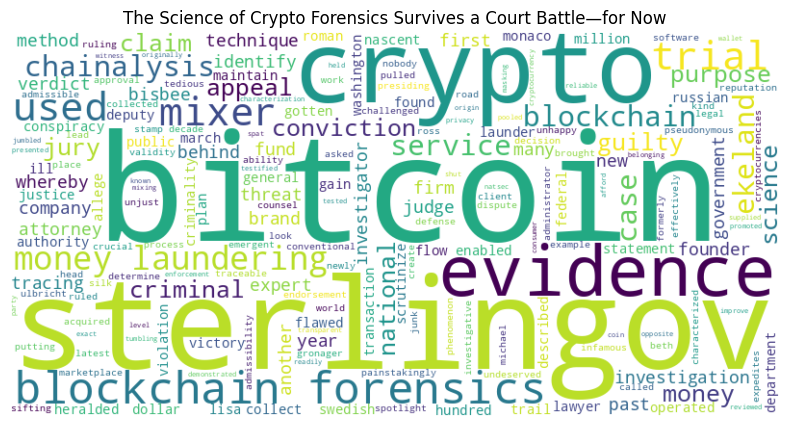

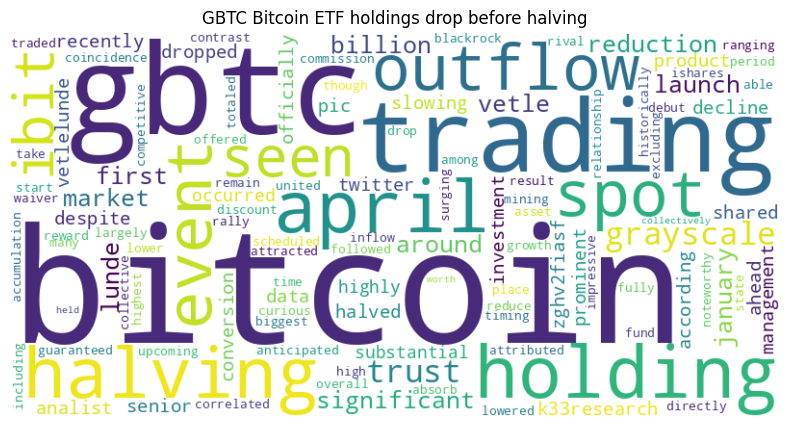

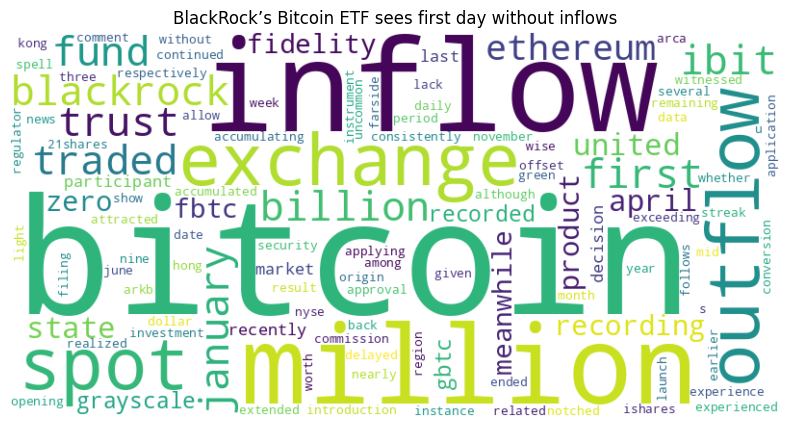

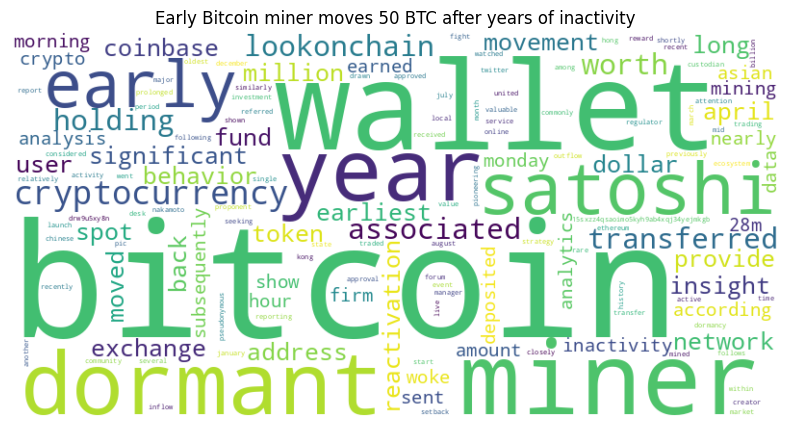

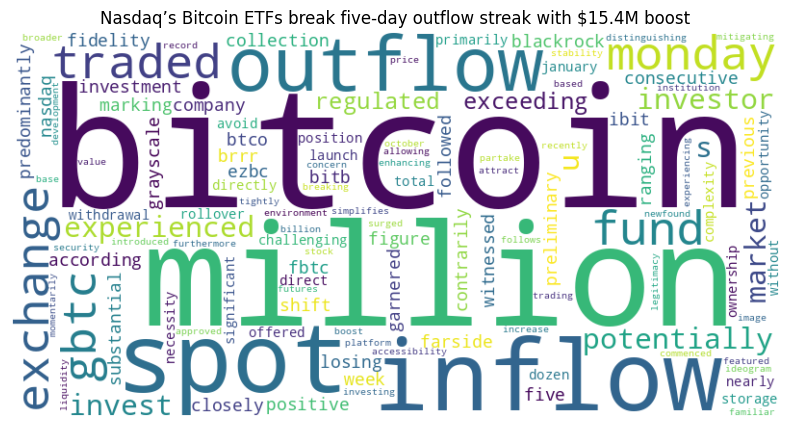

In [124]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words and len(word) > 3]
    return ' '.join(filtered_words)

def plot_word_clouds(articles_data, num_articles=6):
    for i, article in enumerate(articles_data[:num_articles]):
        processed_content = preprocess_text(article['Content'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_content)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(article['Title'])
        plt.axis('off')
    plt.show()

plot_word_clouds(get_articles_data)


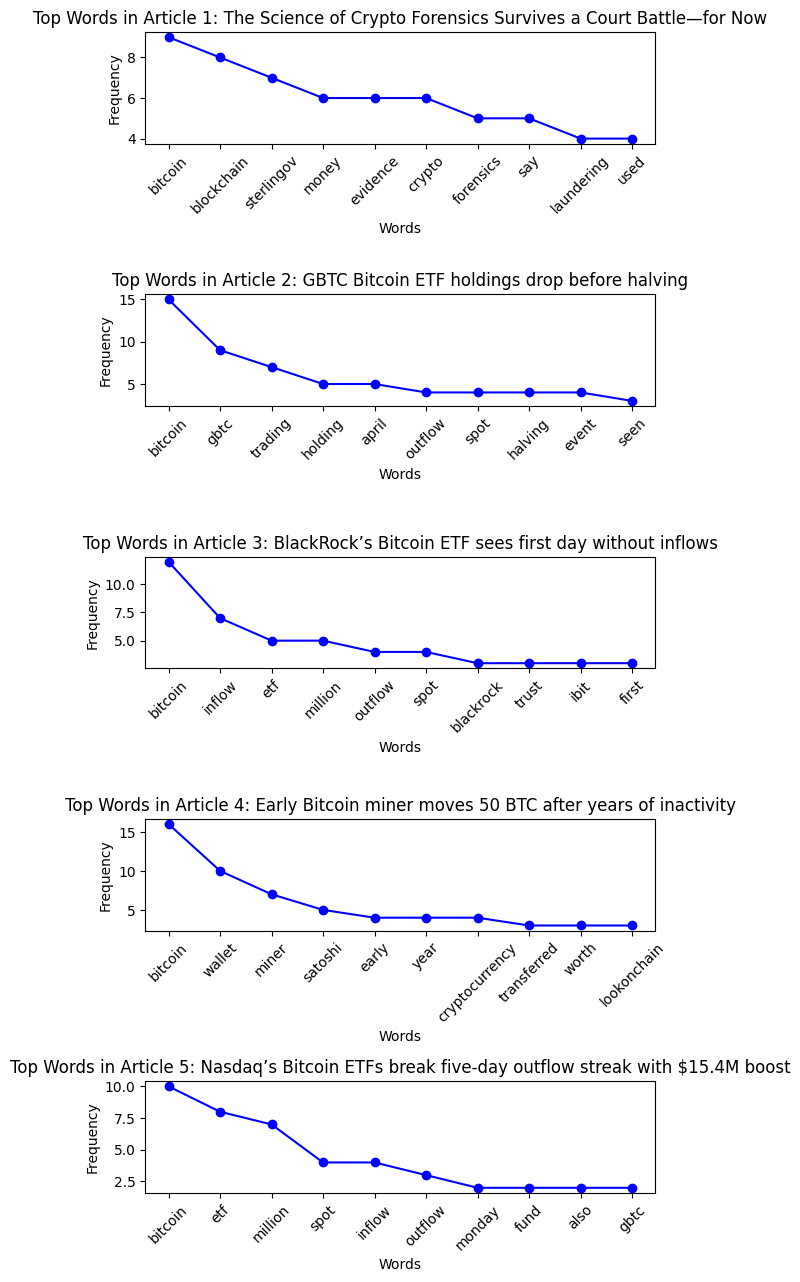

In [125]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_word_frequency_line(articles_data, num_articles=8):
    plt.figure(figsize=(6, 20))
    for i, article in enumerate(articles_data[:num_articles]):

        word_freq = Counter(article['Content'].split())


        words, freqs = zip(*word_freq.most_common(10))
        words = list(words)
        freqs = list(freqs)


        plt.subplot(num_articles, 1, i + 1)
        plt.plot(words, freqs, marker='o', linestyle='-', color='b')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title(f"Top Words in Article {i + 1}: {article['Title']}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_word_frequency_line(get_articles_data)


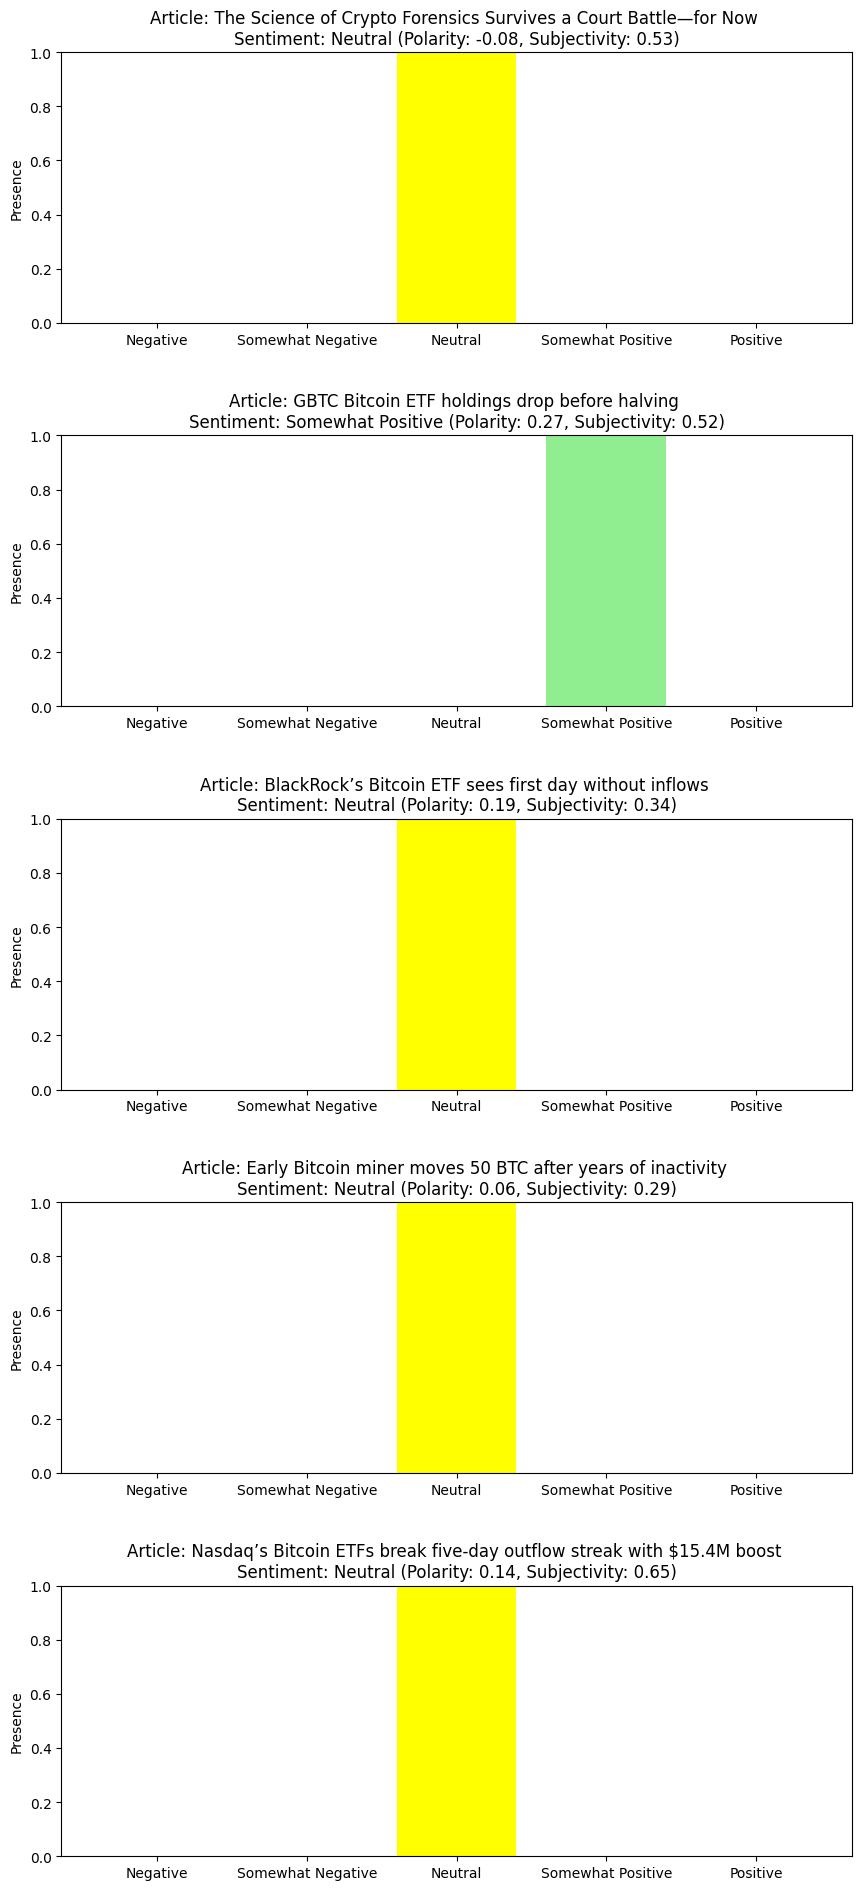

In [126]:
import matplotlib.pyplot as plt

def analyze_and_plot_sentiments(articles_data):

    sentiment_categories = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']
    sentiment_ranges = [(-1.0, -0.2), (-0.6, -0.2), (-0.2, 0.2), (0.2, 0.6), (0.6, 1.0)]


    fig, axes = plt.subplots(nrows=len(articles_data), figsize=(10, 20))
    fig.tight_layout(pad=6.0)

    for i, article in enumerate(articles_data):

        sentiment = TextBlob(article['Content']).sentiment
        polarity = sentiment.polarity

        for category, (low, high) in zip(sentiment_categories, sentiment_ranges):
            if low < polarity <= high:
                sentiment_label = category
                break
        else:
            sentiment_label = 'Neutral'


        axes[i].bar(sentiment_categories, [1 if category == sentiment_label else 0 for category in sentiment_categories], color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
        axes[i].set_title(f"Article: {article['Title']} \nSentiment: {sentiment_label} (Polarity: {polarity:.2f}, Subjectivity: {sentiment.subjectivity:.2f})")
        axes[i].set_ylabel('Presence')
        axes[i].set_ylim(0, 1)

    plt.show()


analyze_and_plot_sentiments(get_articles_data)


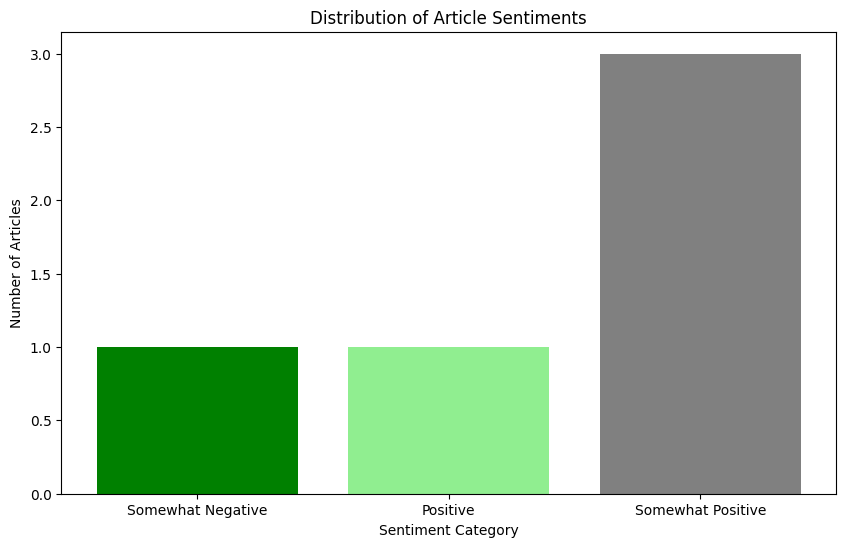

In [127]:
import matplotlib.pyplot as plt

def categorize_sentiment(polarity):
    """Categorize the sentiment based on polarity."""
    if polarity > 0.2:
        return 'Positive'
    elif polarity > 0:
        return 'Somewhat Positive'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > -0.2:
        return 'Somewhat Negative'
    else:
        return 'Negative'

def plot_sentiment_distribution(articles):
    sentiment_categories = [categorize_sentiment(article['Sentiment'].polarity) for article in articles]

    sentiment_counts = {category: sentiment_categories.count(category) for category in set(sentiment_categories)}

    plt.figure(figsize=(10, 6))
    plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'lightgreen', 'grey', 'lightcoral', 'red'])
    plt.xlabel('Sentiment Category')
    plt.ylabel('Number of Articles')
    plt.title('Distribution of Article Sentiments')
    plt.show()

# Example usage:
plot_sentiment_distribution(get_articles_data)


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

texts = [article['Content'] for article in get_articles_data if 'Content' in article]

def perform_tfidf_analysis(texts):

    tfidf = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)


    tfidf_matrix = tfidf.fit_transform(texts)


    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

    return tfidf_df


tfidf_data = perform_tfidf_analysis(texts)


tfidf = TfidfVectorizer(stop_words="english", max_features= 1000, max_df = 0.5, smooth_idf=True)


vector =tfidf.fit_transform(tfidf_data)


X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,547,548,549,550,551,552,553,554,555,556
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [130]:
svd_model.components_.shape

(5, 557)

In [131]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append(t[0])

final_topic_list = [topics[i:i+7] for i in range(0, len(topics), 7)]

for x in final_topic_list:
    print (x)

['Topic 0: ', 'image', '548', 'described', 'zero', 'longest', 'launder']
['Topic 1: ', 'rival', 'natsec', 'received', 'directly', 'lunde', 'figure']
['Topic 2: ', '309', 'evidence', 'cash', 'competitive', 'holding', 'necessity']
['Topic 3: ', 'create', 'conventional', 'woke', 'overall', 'opening', 'curious']
['Topic 4: ', '2022', 'address', '16', 'lunde', 'slowing', 'say']


In [132]:

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint


In [133]:
pip install spacy


In [26]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 6.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [27]:
import spacy
nlp = spacy.load('en_core_web_md')


In [134]:
import spacy
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


nlp = spacy.load("en_core_web_sm")


stop_words = set(stopwords.words('english'))
stop_words.update(spacy.lang.en.stop_words.STOP_WORDS)

def preprocess(text):
    """Lemmatizes, removes stop words, and filters out short words."""
    doc = nlp(text)
    result = [token.lemma_ for token in doc if token.lemma_ not in stop_words and len(token.lemma_) > 2]
    return ' '.join(result)


preprocessed_texts = [preprocess(article['Content']) for article in get_articles_data if 'Content' in article]


dictionary = corpora.Dictionary([text.split() for text in preprocessed_texts])
corpus = [dictionary.doc2bow(text.split()) for text in preprocessed_texts]


lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
lda_topics = lda_model.print_topics(num_words=4)
print("LDA Topics:")
for topic in lda_topics:
    print(topic)


lsi_model = models.LsiModel(corpus, num_topics=5, id2word=dictionary)
lsi_topics = lsi_model.print_topics(num_words=4)
print("\nLSI Topics:")
for topic in lsi_topics:
    print(topic)


dictionary.save('articles.dict')
corpora.MmCorpus.serialize('articles.mm', corpus)
lda_model.save('articles_lda.model')
lsi_model.save('articles_lsi.model')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LDA Topics:
(0, '0.057*"bitcoin" + 0.020*"wallet" + 0.018*"etf" + 0.018*"million"')
(1, '0.002*"bitcoin" + 0.002*"blockchain" + 0.002*"etf" + 0.002*"money"')
(2, '0.023*"bitcoin" + 0.020*"blockchain" + 0.018*"crypto" + 0.018*"sterlingov"')
(3, '0.002*"bitcoin" + 0.002*"gbtc" + 0.002*"inflow" + 0.002*"etf"')
(4, '0.059*"bitcoin" + 0.024*"gbtc" + 0.017*"inflow" + 0.017*"etf"')

LSI Topics:
(0, '0.732*"bitcoin" + 0.175*"etf" + 0.155*"spot" + 0.151*"million"')
(1, '-0.296*"blockchain" + -0.259*"sterlingov" + -0.258*"crypto" + -0.222*"money"')
(2, '-0.385*"wallet" + -0.276*"miner" + -0.222*"early" + 0.203*"etf"')
(3, '0.325*"million" + -0.297*"gbtc" + -0.282*"trading" + 0.243*"inflow"')
(4, '-0.201*"etf" + -0.181*"invest" + 0.177*"ethereum" + 0.170*"inflow"')


In [135]:
from gensim.models.coherencemodel import CoherenceModel


perplexity_lda = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', perplexity_lda)


texts_for_coherence = [text.split() for text in preprocessed_texts]


coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_for_coherence, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -6.184605459334502

Coherence Score:  0.44351318498348064


In [30]:
pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.2 MB/s eta 0:00:00


In [31]:
pip install matplotlib


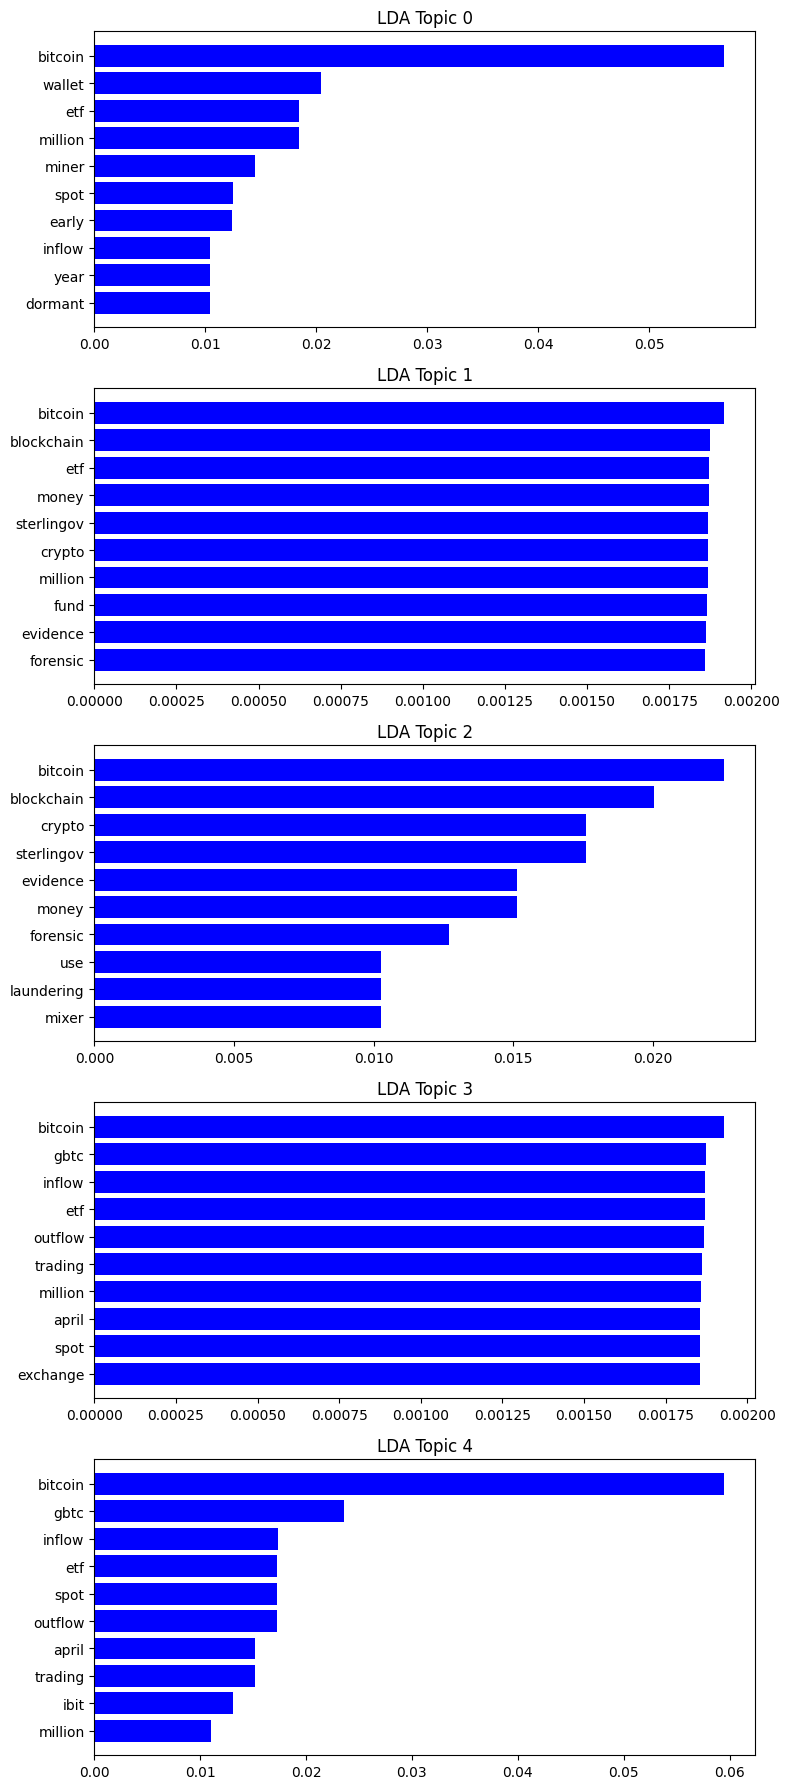

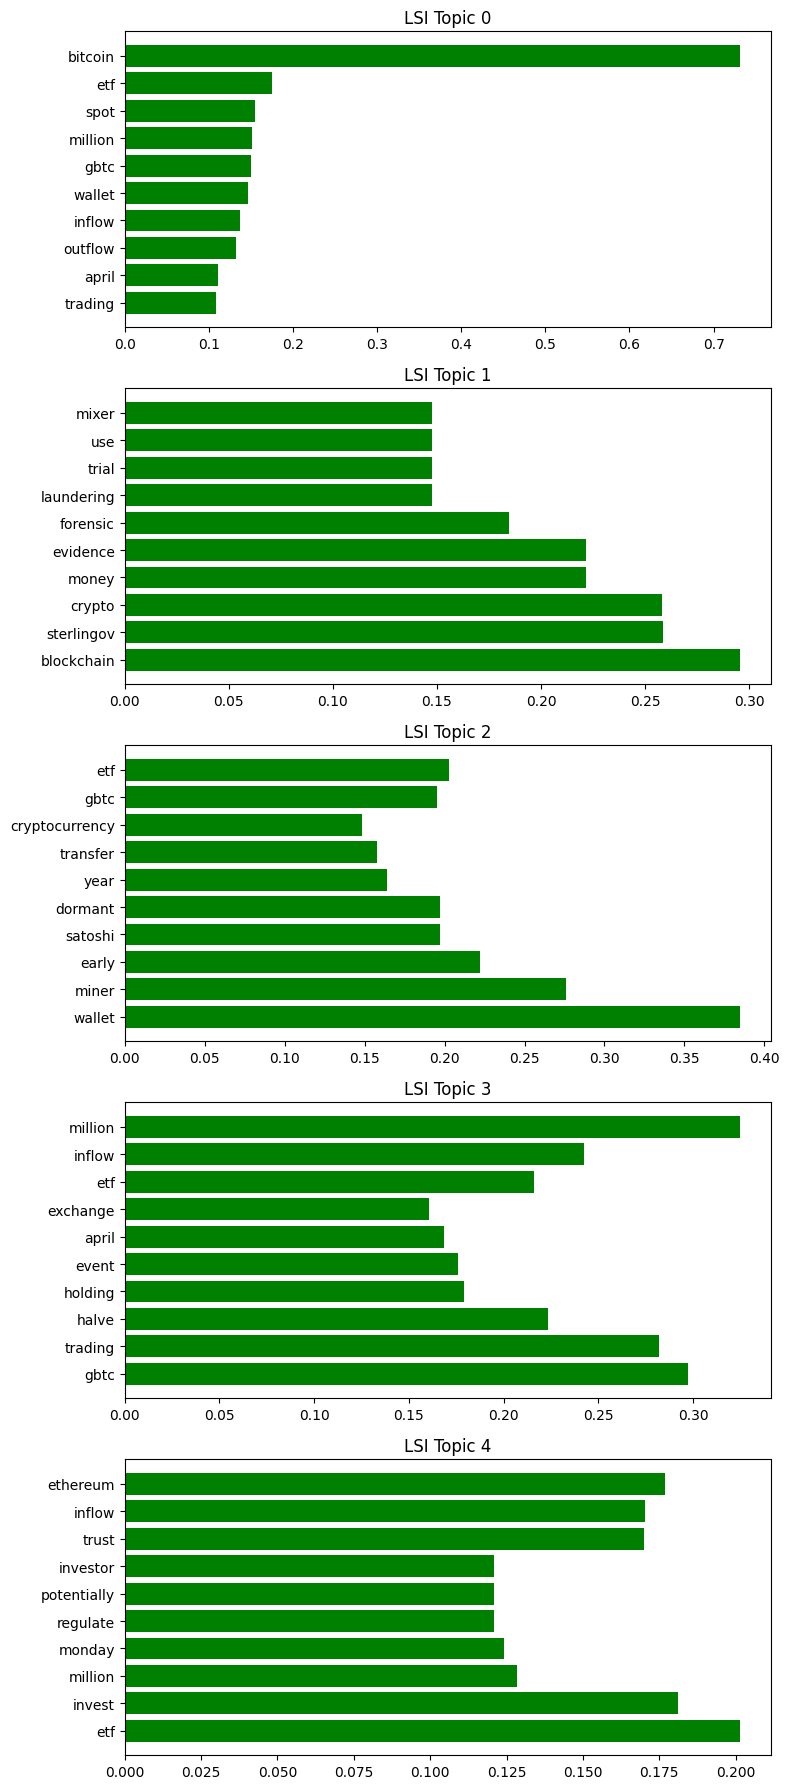

In [136]:
import matplotlib.pyplot as plt

def plot_topics(model, model_name, num_topics=5):
    plt.figure(figsize=(8, 18))
    for i in range(num_topics):
        plt.subplot(num_topics, 1, i + 1)
        topic = model.show_topic(i, topn=10)
        topic = sorted(topic, key=lambda x: x[1])
        terms, weights = zip(*topic)
        terms = [term for term in terms]
        weights = [abs(weight) for weight in weights]
        plt.barh(terms, weights, color='blue' if 'LDA' in model_name else 'green')
        plt.title(f'{model_name} Topic {i}')
    plt.tight_layout()
    plt.show()


plot_topics(lda_model, 'LDA')
plot_topics(lsi_model, 'LSI')


In [137]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
def count_words(text):
    words = word_tokenize(text)
    return len(words)


def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)
get_articles_data = pd.DataFrame(get_articles_data)
get_articles_data.loc[:, 'word_count'] = get_articles_data['Content'].apply(lambda x: count_words(x))
articles_with_1000_words = get_articles_data[get_articles_data['word_count'] >= 1000]

get_articles_data['word_count'] = get_articles_data['Content'].apply(count_words)
get_articles_data['sentence_count'] = get_articles_data['Content'].apply(count_sentences)
print(get_articles_data[['Title', 'word_count', 'sentence_count']])

                                               Title  word_count  \
0  The Science of Crypto Forensics Survives a Cou...         324   
1      GBTC Bitcoin ETF holdings drop before halving         209   
2  BlackRock’s Bitcoin ETF sees first day without...         192   
3  Early Bitcoin miner moves 50 BTC after years o...         233   
4  Nasdaq’s Bitcoin ETFs break five-day outflow s...         170   

   sentence_count  
0               4  
1               1  
2               1  
3               2  
4               1  


Counter({'bitcoin': 4, 'of': 2, 'etf': 2, 'the': 1, 'science': 1, 'crypto': 1, 'forensics': 1, 'survives': 1, 'a': 1, 'court': 1, 'battle—for': 1, 'now': 1, 'gbtc': 1, 'holdings': 1, 'drop': 1, 'before': 1, 'halving': 1, 'blackrock’s': 1, 'sees': 1, 'first': 1, 'day': 1, 'without': 1, 'inflows': 1, 'early': 1, 'miner': 1, 'moves': 1, '50': 1, 'btc': 1, 'after': 1, 'years': 1, 'inactivity': 1, 'nasdaq’s': 1, 'etfs': 1, 'break': 1, 'five-day': 1, 'outflow': 1, 'streak': 1, 'with': 1, '$15.4m': 1, 'boost': 1})
<class 'collections.Counter'>
Number of words in Title: 45


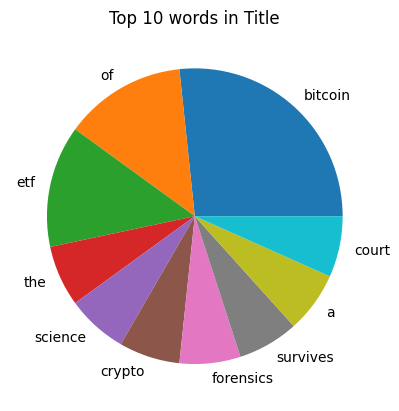

Counter({'bitcoin': 62, 'etf': 17, 'million': 15, 'spot': 14, 'gbtc': 13, 'inflow': 13, 'outflow': 12, 'wallet': 11, 'fund': 10, 'trading': 9, 'april': 9, 'blockchain': 8, 'holding': 8, 'since': 8, 'sterlingov': 7, 'crypto': 7, 'year': 7, 'january': 7, 'day': 7, 'market': 7, 'ibit': 7, 'billion': 7, 'miner': 7, 'money': 6, 'evidence': 6, 'first': 6, 'forensics': 5, 'say': 5, 'cryptocurrency': 5, 'grayscale': 5, 'trust': 5, 'significant': 5, 'recently': 5, 'event': 5, 'launch': 5, 'blackrock': 5, 'however': 5, 'worth': 5, 'exchange-traded': 5, 'also': 5, 'satoshi': 5, 'laundering': 4, 'service': 4, 'used': 4, 'dollar': 4, 'trial': 4, 'mixer': 4, 'among': 4, 'investment': 4, 'halving': 4, 'united': 4, 'state': 4, 'ethereum': 4, 'early': 4, 'case': 3, 'many': 3, 'ekeland': 3, 'firm': 3, 'chainalysis': 3, 'decision': 3, 'company': 3, 'approval': 3, 'security': 3, 'another': 3, 'product': 3, 'seen': 3, 'according': 3, 'data': 3, 'bitcoins': 3, '2024': 3, 'period': 3, 'experienced': 3, 'near

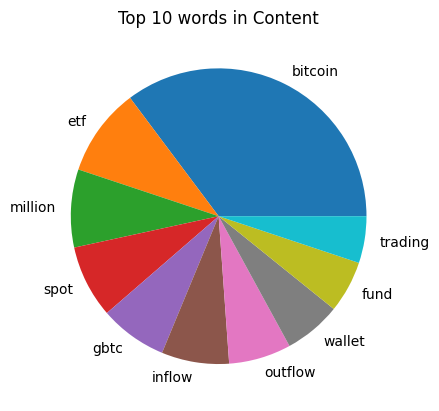

Counter({'bitcoin': 66, 'etf': 19, 'million': 15, 'gbtc': 14, 'spot': 14, 'outflow': 13, 'inflow': 13, 'wallet': 11, 'fund': 10, 'trading': 9, 'april': 9, 'crypto': 8, 'day': 8, 'miner': 8, 'blockchain': 8, 'holding': 8, 'since': 8, 'first': 7, 'sterlingov': 7, 'year': 7, 'january': 7, 'market': 7, 'ibit': 7, 'billion': 7, 'forensics': 6, 'money': 6, 'evidence': 6, 'halving': 5, 'early': 5, 'say': 5, 'cryptocurrency': 5, 'grayscale': 5, 'trust': 5, 'significant': 5, 'recently': 5, 'event': 5, 'launch': 5, 'blackrock': 5, 'however': 5, 'worth': 5, 'exchange-traded': 5, 'also': 5, 'satoshi': 5, 'laundering': 4, 'service': 4, 'used': 4, 'dollar': 4, 'trial': 4, 'mixer': 4, 'among': 4, 'investment': 4, 'united': 4, 'state': 4, 'ethereum': 4, 'science': 3, 'without': 3, 'case': 3, 'many': 3, 'ekeland': 3, 'firm': 3, 'chainalysis': 3, 'decision': 3, 'company': 3, 'approval': 3, 'security': 3, 'another': 3, 'product': 3, 'seen': 3, 'according': 3, 'data': 3, 'bitcoins': 3, '2024': 3, 'period'

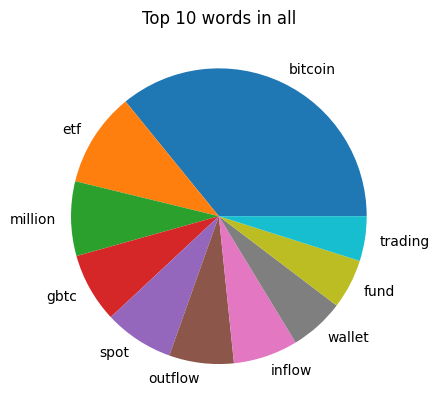

In [138]:
def plot_word_count(data_frame):

    text_all = pd.concat([data_frame['Title'], data_frame['Content']]).astype(str).str.lower().str.cat(sep=' ')


    word_counts_all = Counter(text_all.split())


    word_counts_all.pop('char', None)


    top_words_all = word_counts_all.most_common(10)


    for col in ['Title', 'Content', 'all']:
        if col == 'all':
            text = text_all
            word_counts = word_counts_all
        else:
            text = data_frame[col].astype(str).str.lower().str.cat(sep=' ')
            word_counts = Counter(text.split())


        word_counts.pop('char', None)
        print(word_counts)
        print(type(word_counts))

        top_words = word_counts.most_common(10)


        word_count = len(text.split())
        print(f"Number of words in {col}: {word_count}")


        plt.pie([count for _, count in top_words], labels=[word for word, _ in top_words])
        plt.title(f'Top 10 words in {col}')
        plt.show()
        plt.close()

plot_word_count(get_articles_data)